In [45]:
import os
import matplotlib.pyplot as plt

# valeurs de Z1 et Z2
Z1 = True
Z2 = True

# création des listes pour stocker les coordonnées (NTtoD, Fscore)
#std
path = "C:\workspace2\Datasets\Chalearn\expOut\\"

def getFScoreAndNTtoDoFor(doSSG, useSG,wCTC=0.9,smooth=10,deltaIoU=0.0, vox=4,cudi=3,split=200):
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(0, 11):
        # construction du nom de fichier
        filename = f"vox{str(vox)}_cuDi{cudi}_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split{str(split)}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NTtoD
                    if "FScore:" in line:
                        vals = line.split()
                        fscore = float(vals[1])
                        stdFscore = float(vals[-1])
                    elif "NTtoD:" in line:
                        vals = line.split()
                        nttod = float(vals[1])
                        stdNTtoD = float(vals[-1])
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((nttod, stdNTtoD,fscore, stdFscore))
        else:
            # print(f"Le fichier {filename} n'existe pas.")
            pass
    return nttod_fscore_list

def prettyPrintForLatexIntegration(nttod_fscore_list):
    #if nttod_fscore_list is a list
    if isinstance(nttod_fscore_list, list):
        for nttod, stdNTtoD,fscore, stdFscore in nttod_fscore_list:
            print(f" {fscore*100:.1f} \pm {stdFscore*100:.1f} & {nttod*100:.1f} \pm {stdNTtoD*100:.1f} \\\\")
    else:
        nttod, stdNTtoD,fscore, stdFscore = nttod_fscore_list
        print(f" {fscore*100:.1f} \pm {stdFscore*100:.1f} & {nttod*100:.1f} \pm {stdNTtoD*100:.1f} \\\\")


In [58]:
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)
prettyPrintForLatexIntegration(nttod_fscore_list)

 81.4 \pm 0.7 & 51.9 \pm 0.7 \\
 81.9 \pm 0.4 & 39.6 \pm 1.2 \\
 78.1 \pm 1.3 & 34.6 \pm 0.9 \\
 72.2 \pm 1.2 & 31.0 \pm 0.8 \\
 66.5 \pm 2.1 & 29.4 \pm 0.9 \\
 61.5 \pm 0.9 & 27.3 \pm 0.4 \\
 56.0 \pm 1.6 & 26.2 \pm 0.5 \\
 54.3 \pm 1.1 & 25.3 \pm 0.7 \\
 51.6 \pm 1.7 & 24.6 \pm 0.2 \\
 47.3 \pm 1.9 & 23.7 \pm 0.5 \\
 46.5 \pm 1.7 & 23.3 \pm 0.6 \\


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


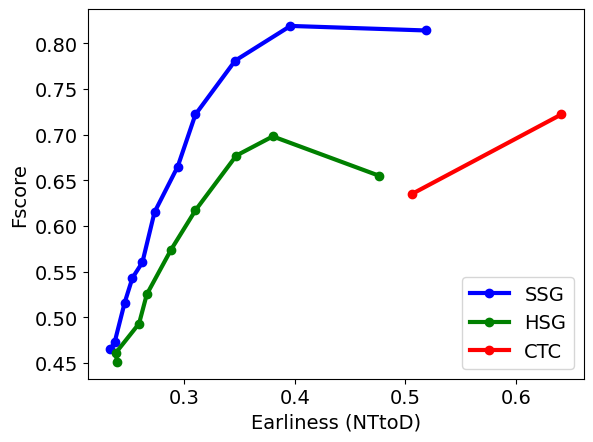

In [46]:


# création de la figure
plt.figure()
plt.rcParams.update({'font.size': 14})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 3

# plt.grid(linestyle="-",linewidth=.4)

# ajout légendes des axes
plt.xlabel("Earliness (NTtoD)")
plt.ylabel("Fscore")

# more labels on x axis
# plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="SSG",  color='blue',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')
# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=True)
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="HSG",  color='green')
nttod_fscore_list = getFScoreAndNTtoDoFor(False, True)[2:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="HSG",  color='green',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')



nttod_fscore_list = getFScoreAndNTtoDoFor(True, False,wCTC=1,smooth=0)[:2]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="CTC",  color='red',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

# legend, smaller
plt.legend(loc='lower right')
# affichage de la figure
# plt.show()
# plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.pdf", format="pdf",bbox_inches='tight')
plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.png", format="png",bbox_inches='tight')
plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.eps", format="eps",bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


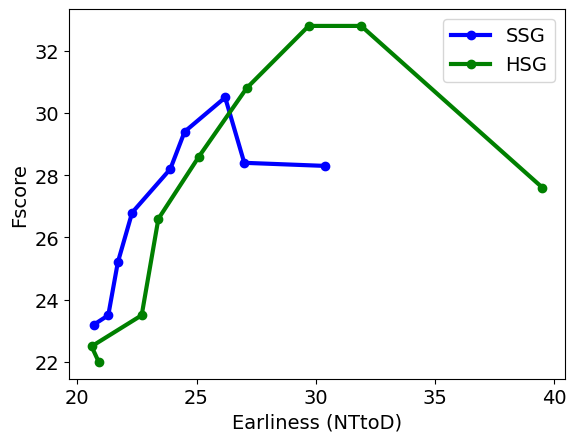

In [47]:
# création de la figure
plt.figure()

plt.rcParams.update({'font.size': 14})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 3

deltaIoU = 0.8
# ajout légendes des axes
plt.xlabel("Earliness (NTtoD)")
plt.ylabel("Fscore")

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,deltaIoU=deltaIoU)[2:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="SSG",  color='blue',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=True)
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="HSG",  color='green')
nttod_fscore_list = getFScoreAndNTtoDoFor(False, True,deltaIoU=deltaIoU)[2:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="HSG",  color='green',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')


# nttod_fscore_list = getFScoreAndNTtoDoFor(True, False,wCTC=1,smooth=0,deltaIoU=0.8)
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="CTC",  color='red')
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

# ajout de la légende
plt.legend()

# affichage de la figure
# plt.show()
plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore08.png", format="png",bbox_inches='tight')
plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore08.eps", format="eps",bbox_inches='tight')

# Comparaison des représentations

In [48]:
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=1,cudi="1e-10",split=700)
print("Vox=1, Cudi=1e-10, Split=700")
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=1, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=1,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=2, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=2,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=3, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=3,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=4, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=4,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[1])
print("Vox=6, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=6,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=7, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=7,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])

Vox=1, Cudi=1e-10, Split=700
 81.1 \pm 0.5 & 34.0 \pm 0.8 \\
Vox=1, Cudi=3, Split=200
 82.2 \pm 0.6 & 39.7 \pm 0.8 \\
Vox=2, Cudi=3, Split=200
 77.8 \pm 0.8 & 41.3 \pm 0.7 \\
Vox=3, Cudi=3, Split=200
 78.7 \pm 0.5 & 41.2 \pm 0.9 \\
Vox=4, Cudi=3, Split=200
 81.9 \pm 0.4 & 39.6 \pm 1.2 \\
Vox=6, Cudi=3, Split=200
 80.7 \pm 0.4 & 40.0 \pm 0.8 \\
Vox=7, Cudi=3, Split=200
 82.4 \pm 0.6 & 39.5 \pm 0.8 \\


# Comparaison des Losses

In [49]:
print("Only CTC, no smooth, no per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=1,smooth=0)
prettyPrintForLatexIntegration(nttod_fscore_list)
print("CTC + smooth, no per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=1,smooth=10)
prettyPrintForLatexIntegration(nttod_fscore_list)
print("CTC + smooth+ per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)
prettyPrintForLatexIntegration(nttod_fscore_list[1])
print("no CTC, smooth+ per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=0,smooth=0.5)
prettyPrintForLatexIntegration(nttod_fscore_list)
# print("no CTC, no smooth, per frame")
# nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=0,smooth=0)
# prettyPrintForLatexIntegration(nttod_fscore_list)
print("Normal CTC")
nttod_fscore_list = getFScoreAndNTtoDoFor(doSSG=True, useSG=False,wCTC=1,smooth=0)
prettyPrintForLatexIntegration(nttod_fscore_list)


Only CTC, no smooth, no per frame
 80.8 \pm 0.8 & 39.3 \pm 0.9 \\
CTC + smooth, no per frame
 82.7 \pm 0.5 & 39.0 \pm 1.0 \\
CTC + smooth+ per frame
 81.9 \pm 0.4 & 39.6 \pm 1.2 \\
no CTC, smooth+ per frame
 36.7 \pm 2.5 & 22.7 \pm 0.3 \\
Normal CTC
 72.2 \pm 13.3 & 64.1 \pm 6.3 \\
 63.5 \pm 2.7 & 50.6 \pm 0.7 \\
 23.4 \pm 19.5 & 50.8 \pm 1.7 \\
 5.7 \pm 10.3 & 29.2 \pm 15.5 \\
 0.4 \pm 0.1 & 14.8 \pm 8.7 \\
 0.8 \pm 0.2 & 11.4 \pm 6.8 \\
 1.1 \pm 0.2 & 9.9 \pm 4.8 \\
 1.1 \pm 0.2 & 13.3 \pm 2.6 \\
 1.2 \pm 0.1 & 9.4 \pm 3.4 \\
 6.2 \pm 9.2 & 22.3 \pm 10.2 \\
 10.3 \pm 6.3 & 34.7 \pm 10.7 \\


# Evolution of Earliness and Fscore with the weightPrior variation

In [50]:
nttod_fscore_list_SGG = getFScoreAndNTtoDoFor(doSSG=True,useSG= True)
nttod_fscore_list_HGG = getFScoreAndNTtoDoFor(doSSG=False, useSG=True)
nttod_fscore_list_CTC = getFScoreAndNTtoDoFor(doSSG=True,useSG=False, wCTC=1,smooth=0) # doSSG is True, but is not used when useSG is False


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


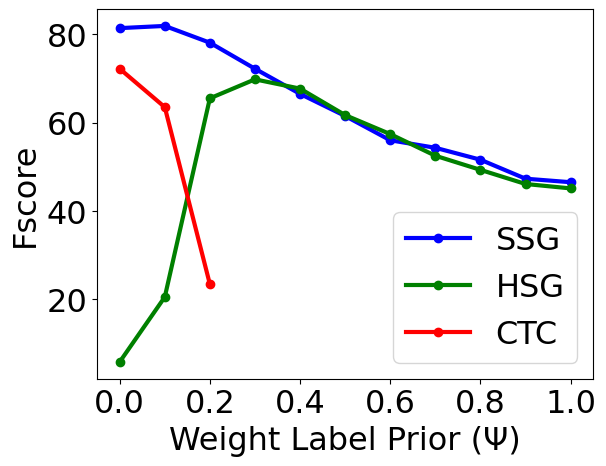

In [53]:
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 3
# plot the evolution of the Fscore with the weightPrior, nttod_fscore_list_HGG is the list ordered by weightPrior (from 0 to 1), use it as absciss
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][:3], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_CTC[:3])), label="CTC",  color='red',marker="o")
plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("Fscore")

plt.xticks([0,0.2,0.4,0.6,0.8,1])
#legend
plt.legend()
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_CTC)), color='red')

plt.savefig("../Illustrations/ScoreGraphics/Fscore_wprior.png", format="png",bbox_inches='tight')
plt.savefig("../Illustrations/ScoreGraphics/Fscore_wprior.eps", format="eps",bbox_inches='tight')

### plot the evolution of the NTtoD with the weightPrior

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


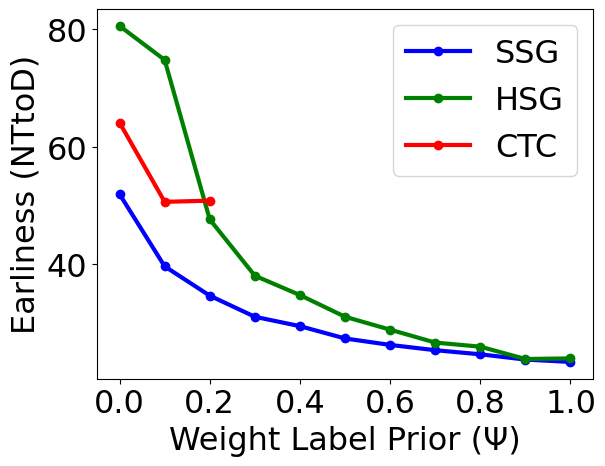

In [56]:
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 3
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][:3], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC[:3])), label="CTC",  color='red',marker="o")

plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("Earliness (NTtoD)")
plt.xticks([0,0.2,0.4,0.6,0.8,1])

#legend
plt.legend()
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_CTC)), color='red')

plt.savefig("../Illustrations/ScoreGraphics/NTtoD_wprior.png", format="png",bbox_inches='tight')
plt.savefig("../Illustrations/ScoreGraphics/NTtoD_wprior.eps", format="eps",bbox_inches='tight')